## Algorithme de Djikastra

### importation de donné

In [16]:
import random
import networkx as nx
import matplotlib.pyplot as plt


<p style="font-family:verdana;font-size:18px">L'algorithme de Dijkstra est un algorithme de recherche de chemin le plus court  pour trouver ce chemin entre deux noeuds dans un graphe pondéré et sans cycles de poids négatif. <br><br>
    Il utilise une approche "gourmande" pour sélectionner à chaque étape le noeud avec la distance la plus courte parmi tous les noeuds non visités, jusqu'à ce que tous les noeuds aient été visités.</p>

### Création de class Djikastra 
la classe ayant 3 propriété graph distance et previous



In [2]:
class Dijkstra:
    def __init__(self, graph):
        self.graph = graph
        self.distances = {node: float('inf') for node in graph}
        self.previous = {node: None for node in graph}
    
    def find_shortest_path(self, start, end):
        self.distances[start] = 0
        unvisited = set(self.graph)

        while unvisited:
            current = min(unvisited, key=self.distances.get)
            unvisited.remove(current)

            for neighbor, weight in self.graph[current].items():
                potential_distance = self.distances[current] + weight
                if potential_distance < self.distances[neighbor]:
                    self.distances[neighbor] = potential_distance
                    self.previous[neighbor] = current
        
        path = []
        current = end
        while current is not None:
            path.append(current)
            current = self.previous[current]
        
        return path[::-1]
        
    def draw_shortest_path(self, path):
        G = nx.Graph()
        for node, neighbors in self.graph.items():
            for neighbor, weight in neighbors.items():
                G.add_edge(node, neighbor, weight=weight)

        pos = nx.spring_layout(G)
        nx.draw(G, pos)

        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        nx.draw_networkx_labels(G, pos)

        shortest_path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=shortest_path_edges, edge_color='r', width=5)

        plt.show()



### création de la fonction pour générer un graphe
 le graph a des poids valué d'une maniére aléatroire

In [12]:
def generate_random_graph(n, min_weight, max_weight):
    graph = {}
    nodes = [chr(i) for i in range(ord('A'), ord('A')+n)]
    for node in nodes:
        graph[node] = {}
        neighbors = random.sample(nodes, random.randint(1, n-1))
        for neighbor in neighbors:
            graph[node][neighbor] = random.randint(min_weight, max_weight)
    return graph
random.seed(1)
graph =  generate_random_graph(8, 1, 5)

['A', 'B', 'H', 'G']


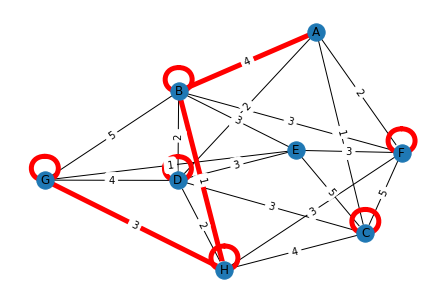

In [15]:
DT = Dijkstra(graph)
shortest_path = DT.find_shortest_path('A','G')
print(shortest_path)
DT.draw_shortest_path( shortest_path)